<a href="https://www.kaggle.com/code/vitorgamalemos/multinomial-logistic-regression-from-scratch">Kaggle article - Recognizing Iris flowers
</a>


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

sns.set(style='whitegrid'); sns.set_context('talk')
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_iris
iris_data = load_iris()

X = iris_data.data
y = iris_data.target


In [52]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [53]:
iris_data.data.shape

(150, 4)

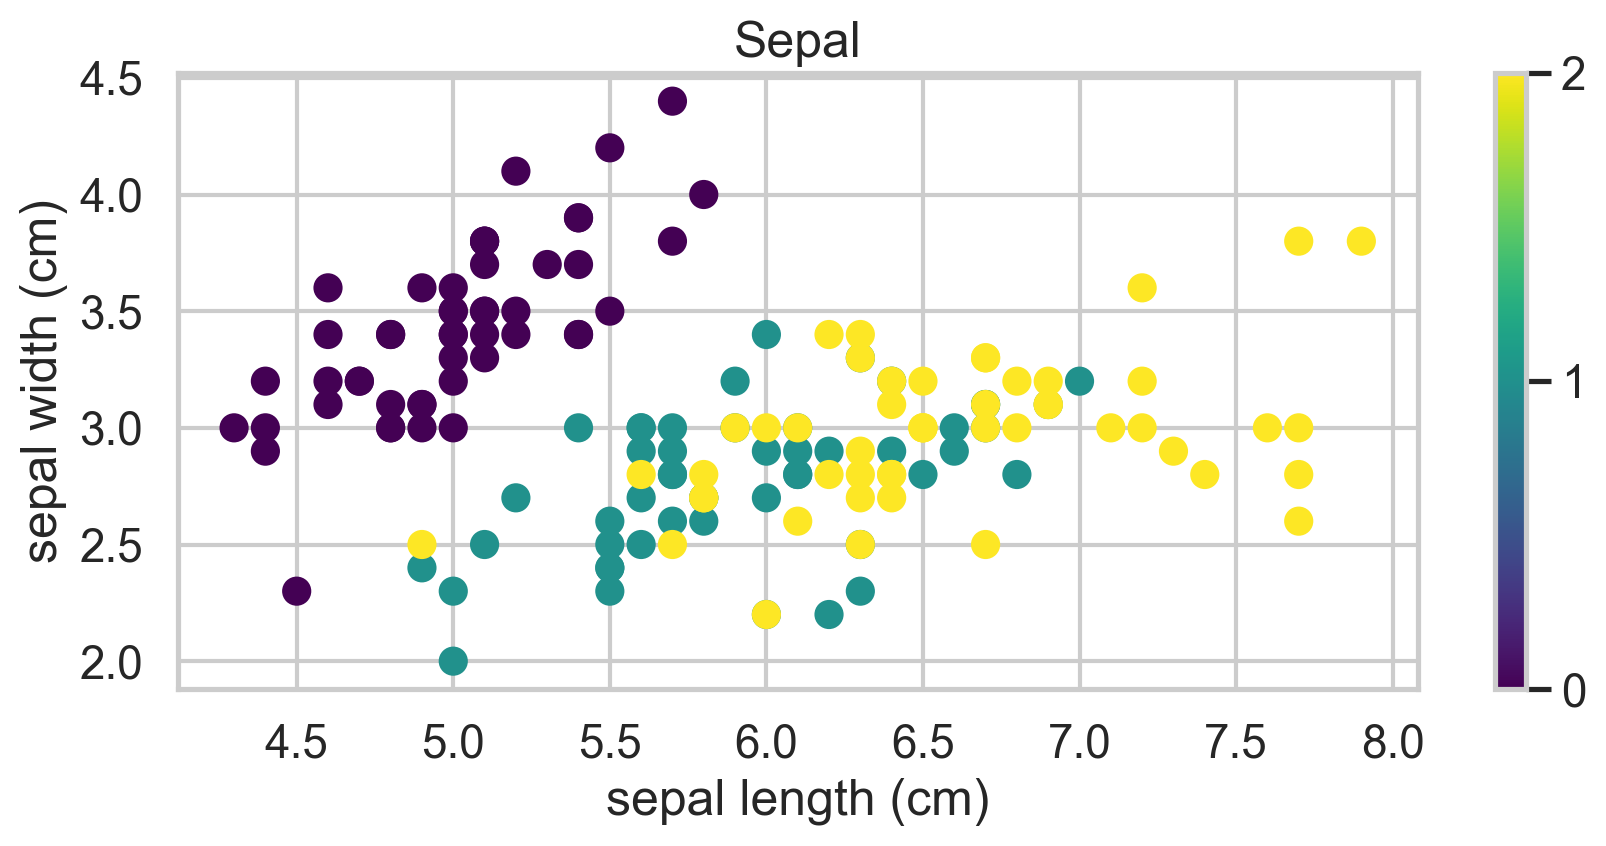

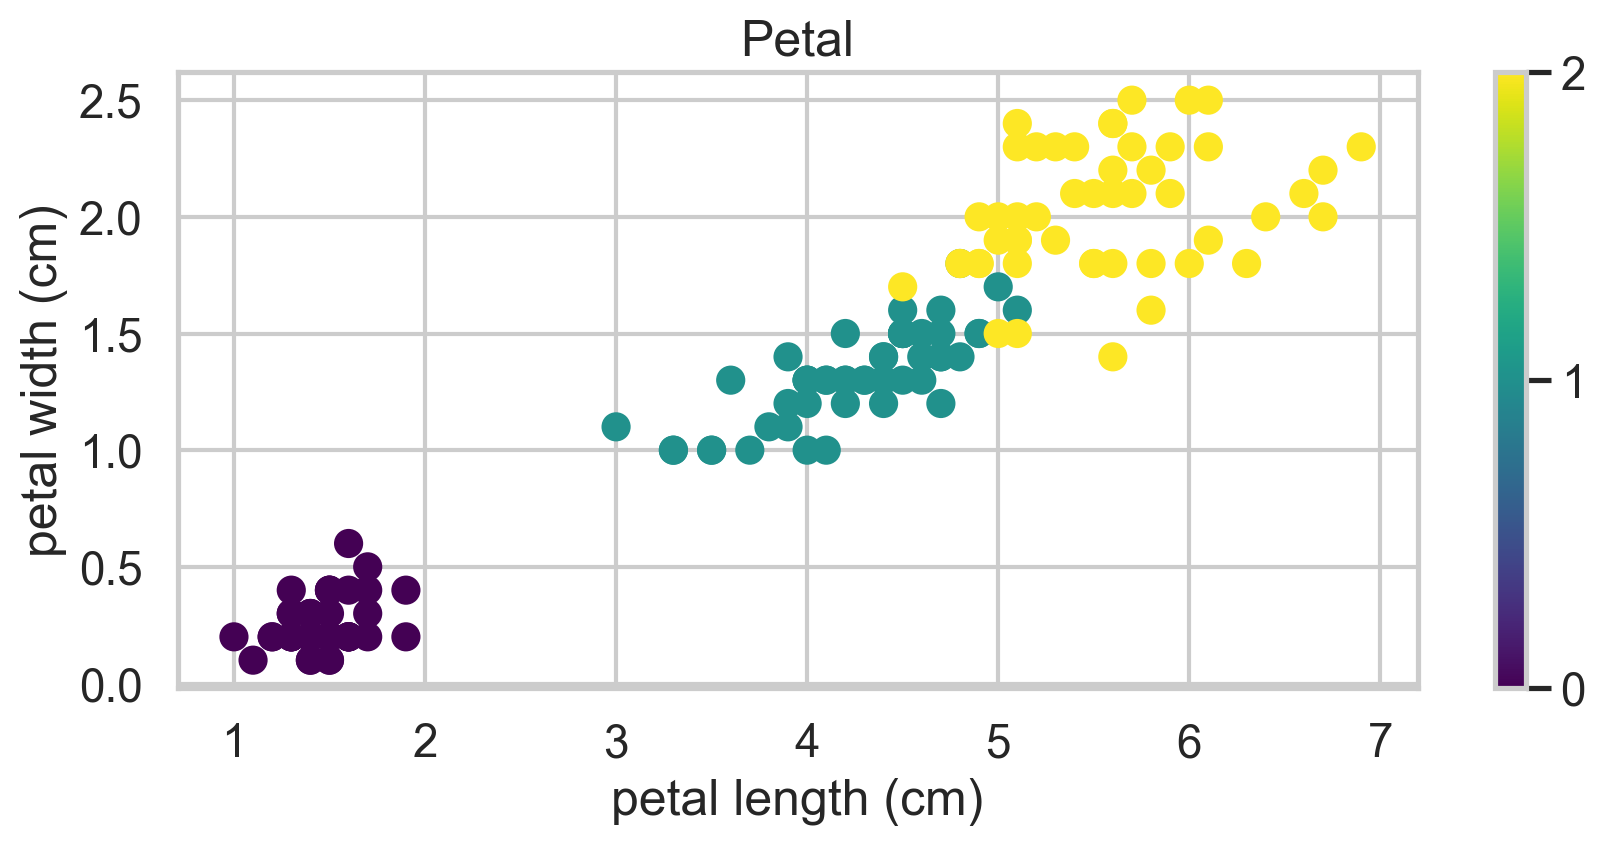

In [54]:
n_samples, n_features = iris_data.data.shape

def Show_Diagram(x_label,y_label,title):
    plt.figure(figsize=(10,4))
    plt.scatter(iris_data.data[:,x_label], iris_data.data[:,y_label], c=iris_data.target, cmap=cm.viridis)
    plt.xlabel(iris_data.feature_names[x_label]); plt.ylabel(iris_data.feature_names[y_label]); plt.title(title)
    plt.colorbar(ticks=([0, 1, 2]));plt.show();x_label = 2;y_label=3;title='Petal'

Show_Diagram(0,1,'Sepal')
Show_Diagram(2,3,'Petal')

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=52)

In [94]:
from configparser import MAX_INTERPOLATION_DEPTH
from pyclbr import Class
from unittest.mock import Base
from matplotlib.pyplot import xscale
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.preprocessing import OneHotEncoder

class MultinomialLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, params=None):
        if params == None:
            self.learning_rate = 0.005
            self.max_epoch = 3000
            self.l2_mu = 0.01
        else:
            self.learning_rate = params['learning_rate']
            self.max_epoch = params['max_epoch']
            self.l2_mu = params['l2_mu']
        self.X = None
        self.y = None
        self.W = None
    
    def softmax(self, z):
        return np.exp(z)/np.sum(np.exp(z - np.max(z, axis=0)), axis=0)
    
    def get_loss(self, W, y_onehot):
        N = self.X.shape[0]
        Z = - self.X @ W
        loss = 1/N * (np.trace(self.X @ W @ y_onehot.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
        return loss
    
    def get_gradient(self, W, y_onehot):
        N = self.X.shape[0]
        Z = - self.X @ W
        y_pred = self.softmax(Z)
        return 1/N * (self.X.T @ (y_onehot - y_pred)) + 2 * self.l2_mu * W
    
    def gradient_descent(self):
        iter = 0
        losses = []
        steps = []
        y_onehot = OneHotEncoder().fit_transform(self.y.reshape(-1, 1))
        print(f"y_onehot shape = {y_onehot.shape}")
        W = np.zeros((self.X.shape[1], y_onehot.shape[1]))
        while iter < self.max_epoch:
            iter += 1
            W = W - self.learning_rate * self.get_gradient(W, y_onehot)
            steps.append(iter)
            losses.append(self.get_loss(W, y_onehot))
        
        df = pd.DataFrame({'steps': steps, 'losses': losses})
        self.W = W
        
        return df.plot(
            x='steps', 
            y='losses',
            xlabel='step',
            ylabel='loss'
        )
        
        return df, W
    
    def predict(self, X):
        Z = - X @ self.W
        y_pred = self.softmax(Z)
        return np.argmax(y_pred, axis=1)
    
    def fit(self, X, y):
        print(X.shape, y.shape)
        if self.X or self.y:
            raise Exception("Already fitted")
        self.X = X
        self.y = y
        self.gradient_descent()

(120, 4) (120,)
y_onehot shape = (120, 3)


array([[ True,  True, False, False, False, False, False,  True, False,
        False, False, False, False,  True, False, False,  True, False,
        False,  True, False,  True, False, False, False, False, False,
        False, False, False],
       [ True,  True, False, False, False, False, False,  True, False,
        False, False, False, False,  True, False, False,  True, False,
        False,  True, False,  True, False, False, False, False, False,
        False, False, False],
       [False, False,  True,  True,  True, False, False, False,  True,
         True,  True,  True, False, False,  True,  True, False,  True,
         True, False, False, False, False, False,  True,  True, False,
        False,  True, False],
       [False, False,  True,  True,  True, False, False, False,  True,
         True,  True,  True, False, False,  True,  True, False,  True,
         True, False, False, False, False, False,  True,  True, False,
        False,  True, False],
       [False, False,  True,

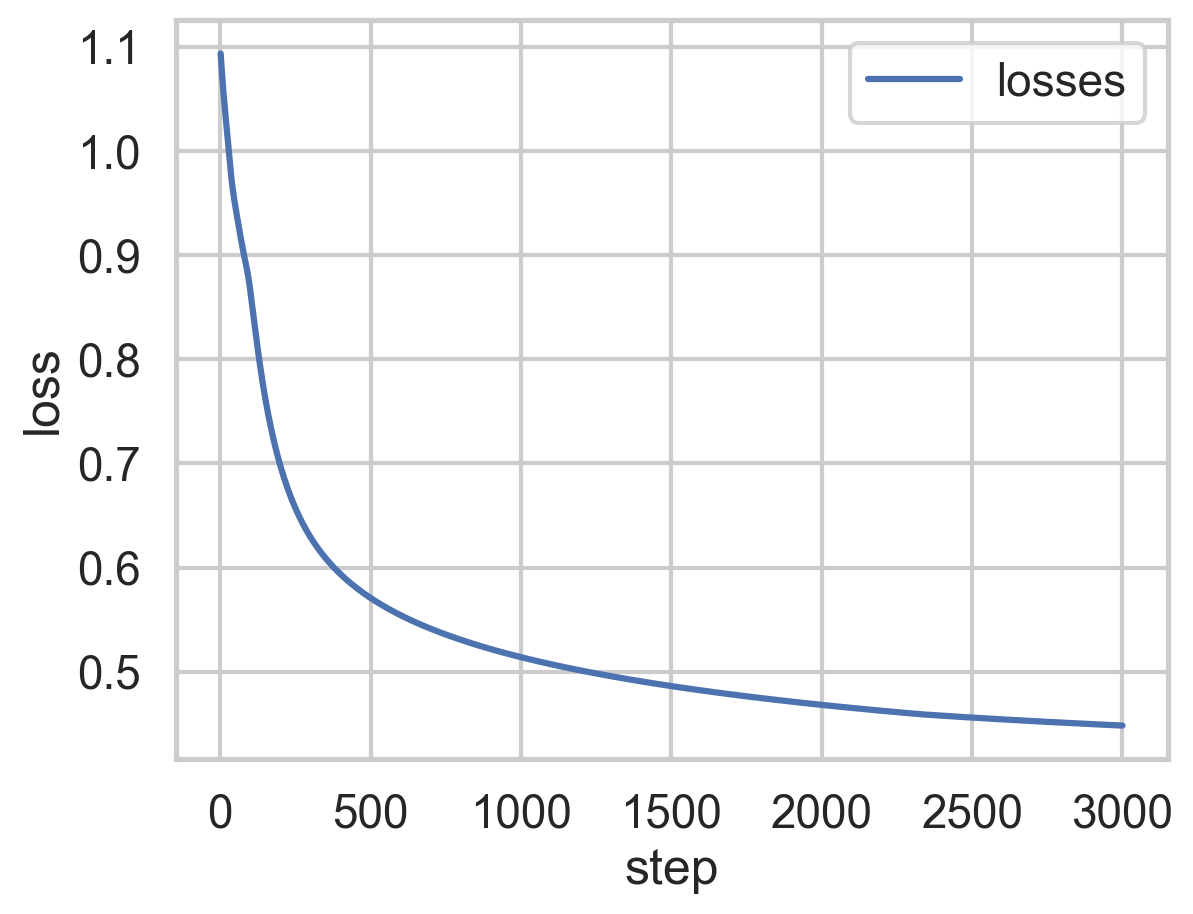

In [112]:
logistic_regression = MultinomialLogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = np.asarray(logistic_regression.predict(X_test))

In [113]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.78      0.82         9
           2       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.91        30
weighted avg       0.90      0.90      0.90        30



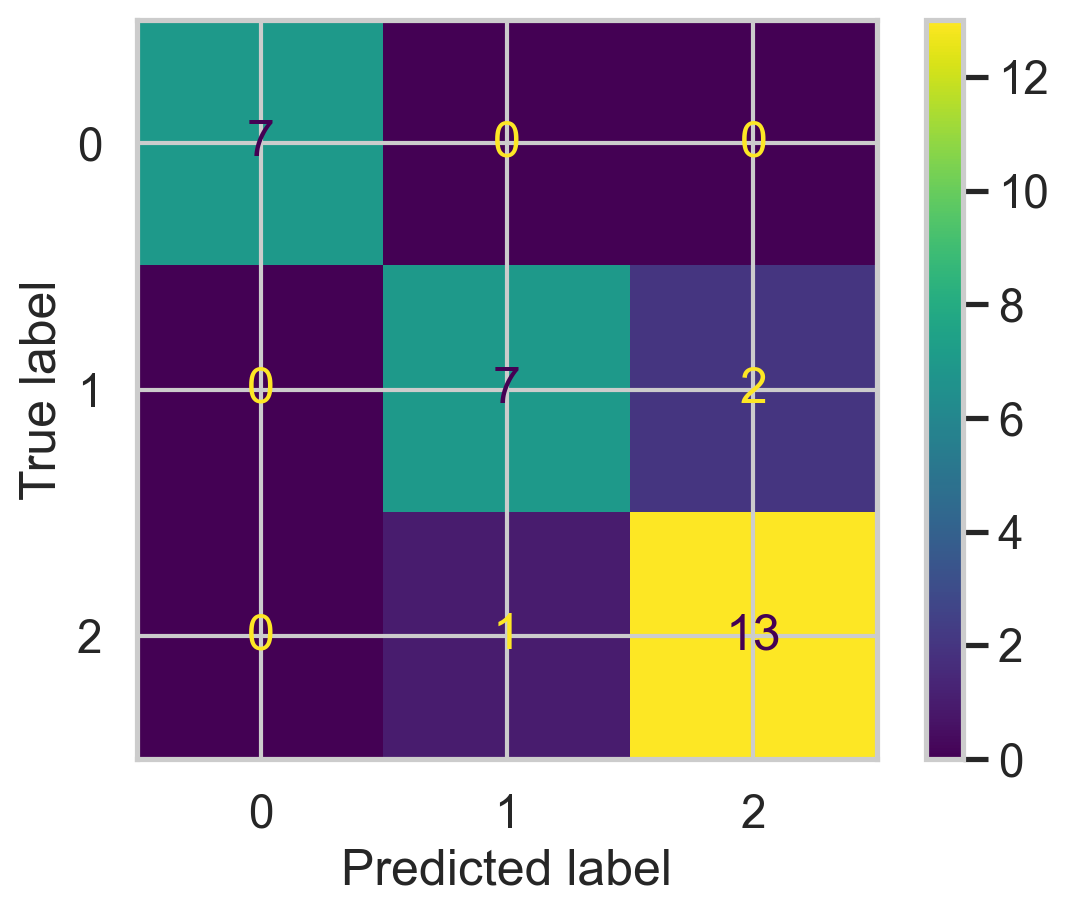

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()